## IS-507 Final Project

# MEAN REVERSION

## Null Hypothesis: Efficient Market Hypothesis
### The efficient market hypothesis (EMH), alternatively known as the efficient market theory, is a hypothesis that states that share prices reflect all available information and consistent profit generation is impossible. According to the EMH, stocks always trade at their fair value on exchanges, making it impossible for investors to purchase undervalued stocks or sell stocks for inflated prices.

### Mean reversion is a financial theory that suggests asset prices will eventually return to their long-term mean or average. This concept is grounded in the belief that asset prices and historical returns will gravitate toward a long-term average over time. The greater the deviation from this mean, the higher the probability that the asset's price will move closer to it in the future.

### In this simulation we use statistical tools like Z-scores to measure how far an asset price has deviated from its mean. A Z-score above 1 or below -1 might signal a trading opportunity.

### We will finally test our Null Hypothesis using two Statistical Tests - The Mann Whitney U test and the Kruskal-Wallis test

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Reading the dataset
stocks = pd.read_csv('all_stocks_5yr.csv')
stocks

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [3]:
# Manipulating the data to only store stock close prices
df = stocks.pivot(index='date', columns='Name', values='close')

In [4]:
df

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


In [5]:
df.describe().reset_index()

Name,index,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,count,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
1,mean,49.202025,38.393252,132.433463,109.066698,60.86444,82.092979,42.940326,101.119079,90.458156,...,35.315099,49.833474,87.668447,53.821882,40.486807,41.434095,75.451009,105.606291,32.171790,45.098648
2,std,9.229804,10.957636,31.274463,30.556812,13.73038,16.315690,5.860169,22.129031,36.997773,...,3.874693,9.517797,6.959475,7.599269,7.949466,11.319674,7.485003,15.052699,7.673401,11.981390
3,min,33.370000,13.020000,76.180000,55.789900,35.27000,46.180000,32.930000,70.280000,38.110000,...,27.960000,35.510000,68.710000,40.240000,27.520000,24.190000,59.700000,72.380000,19.900000,28.400000
4,25%,41.560000,34.330000,104.440000,84.830650,52.65000,70.525000,38.475000,80.670000,65.865000,...,32.175000,43.222500,82.435000,47.015000,34.400000,34.590000,70.225000,96.075000,27.505000,32.830000
5,50%,46.700000,40.870000,141.300000,109.010000,60.17000,82.560000,42.300000,97.770000,80.590000,...,35.010000,46.860000,87.290000,53.540000,40.000000,37.280000,74.100000,105.970000,29.230000,45.620000
6,75%,56.495000,46.535000,156.730000,127.120000,65.74500,92.520000,45.785000,117.045000,105.710000,...,37.770000,54.060000,92.085000,60.805000,45.480000,49.155000,80.470000,117.315000,32.462500,51.295000
7,max,74.820000,58.470000,200.380000,179.260000,123.21000,115.480000,63.420000,162.550000,201.300000,...,46.660000,76.300000,104.380000,68.580000,57.280000,75.660000,94.880000,133.090000,54.980000,80.090000


In [6]:
# Sorting the data according to the highest standard deviation
std_df = pd.DataFrame(df.describe().reset_index().iloc[2, :])
std_df = std_df.iloc[1:, :]
std_df

,2
Name,
A,9.229804
AAL,10.957636
AAP,31.274463
AAPL,30.556812
ABBV,13.73038
...,...
XYL,11.319674
YUM,7.485003
ZBH,15.052699


### Although PCLN has the highest standard deviation, for our project purposes we pick Intel (INTC) as PCLN was acquired by BKNG causing a break in continous financial data required for this analysis. Also Mean Reversion requires a depreciating security which leads us to select Intel for the purpose of this project.

In [7]:
ticker = ['INTC']

In [8]:
# Scraping Data off Yahoo Finance
import pandas_datareader.data as pdr
import datetime
yf.pdr_override()
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2023, 11, 15)
df = pdr.get_data_yahoo(ticker, start=start, end=end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800
...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500


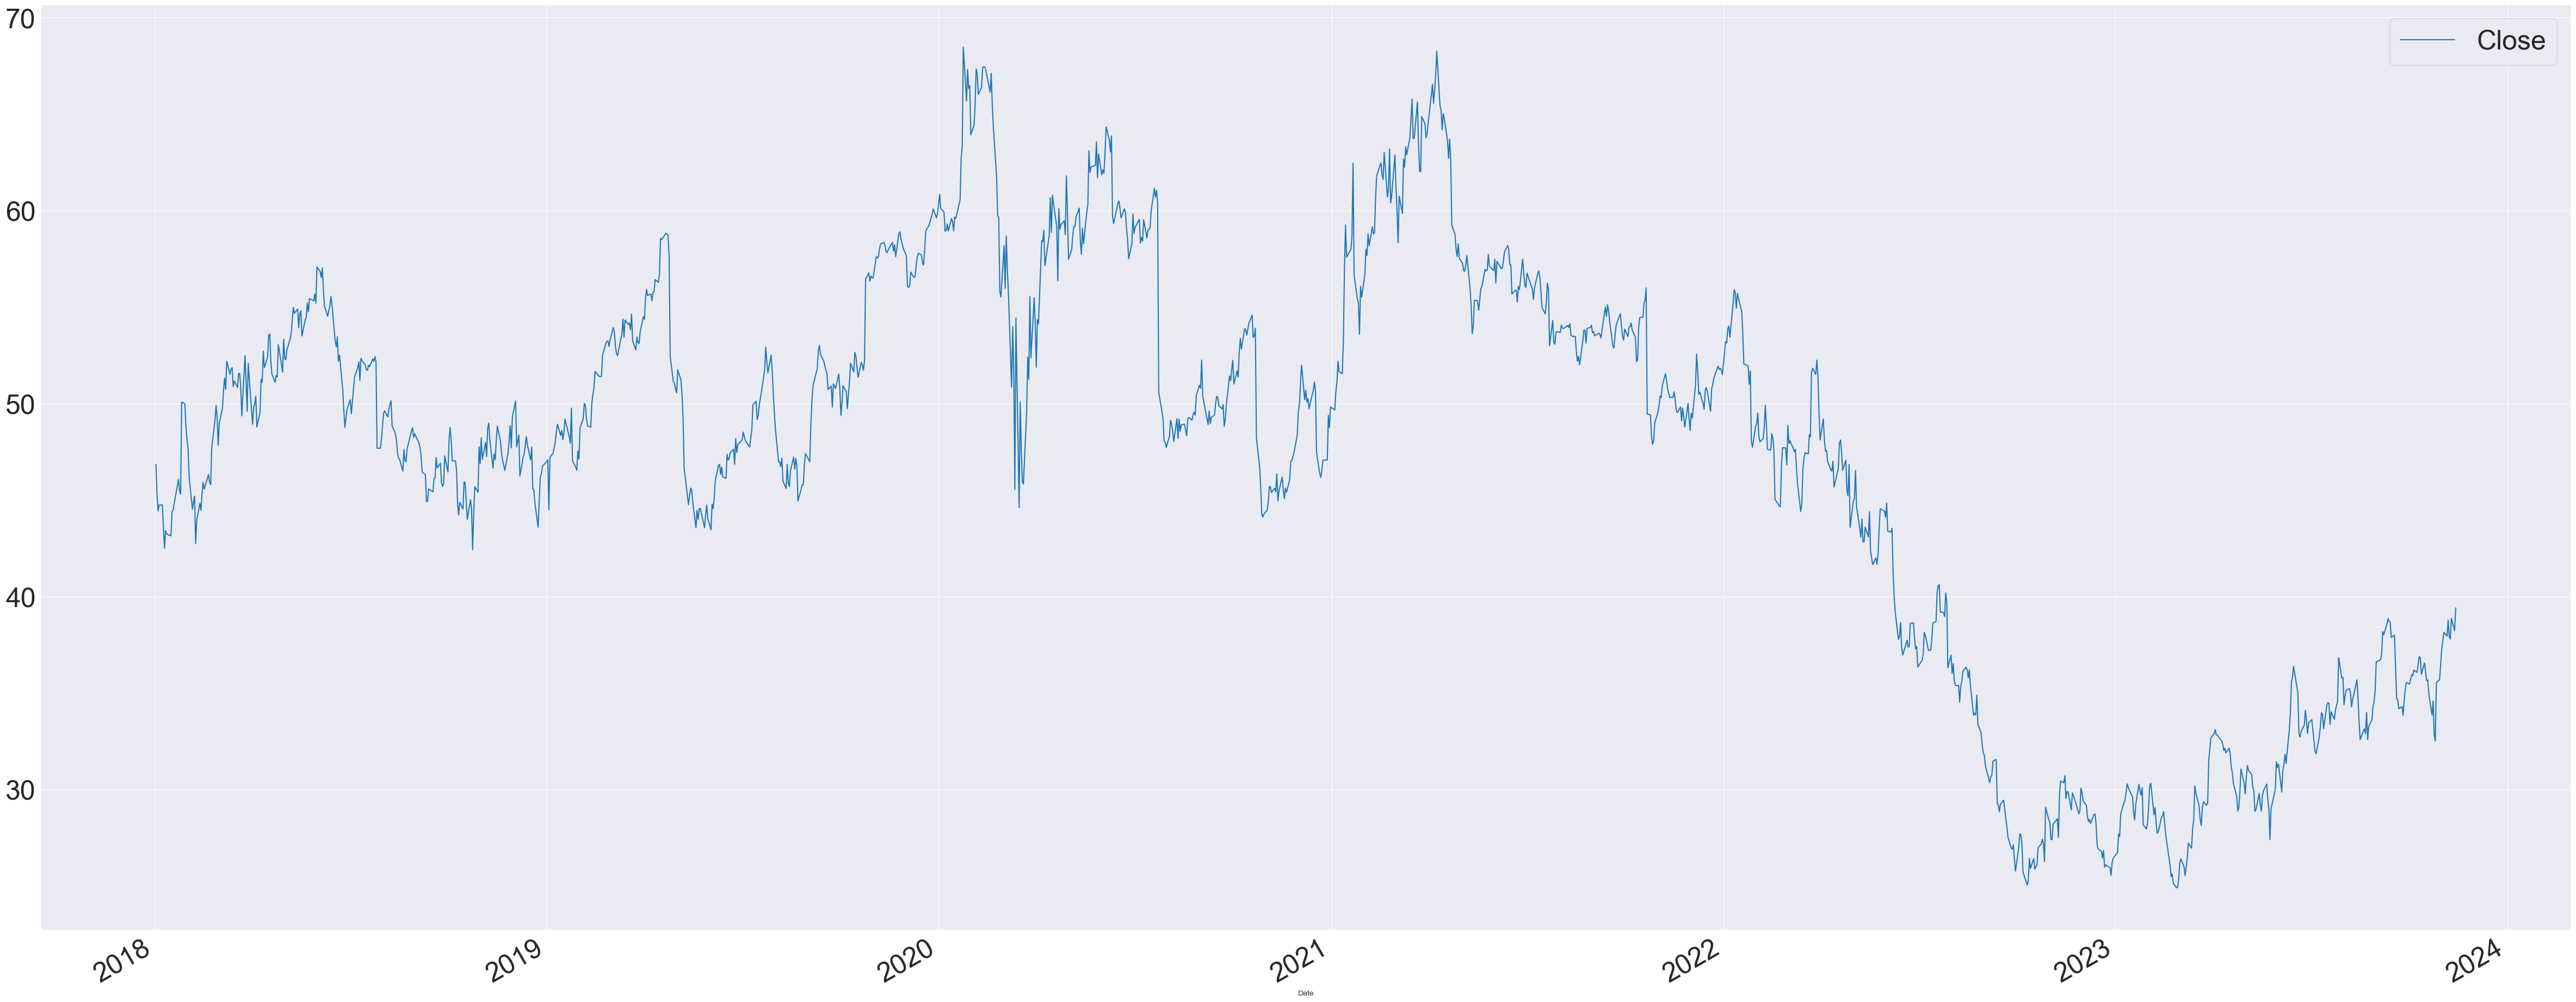

In [9]:
# Visualising INTC stock price over time
df['Close'].plot(figsize=(60, 25), fontsize=36)
plt.legend(fontsize=36)

In [10]:
# Here we take the window of rolling mean to be 1 month and Z-score threshold to be 1.0
window = 30
thresh = 1
df['RollingMean'] = df['Close'].rolling(window=window).mean()
df['RollingStd'] = df['Close'].rolling(window=window).std()
df

,Open,High,Low,Close,Adj Close,Volume,RollingMean,RollingStd
Date,,,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800,NaN,NaN
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000,NaN,NaN
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100,NaN,NaN
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000,NaN,NaN
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400,36.007000,1.418217
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800,36.094333,1.445933
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500,36.204667,1.526980


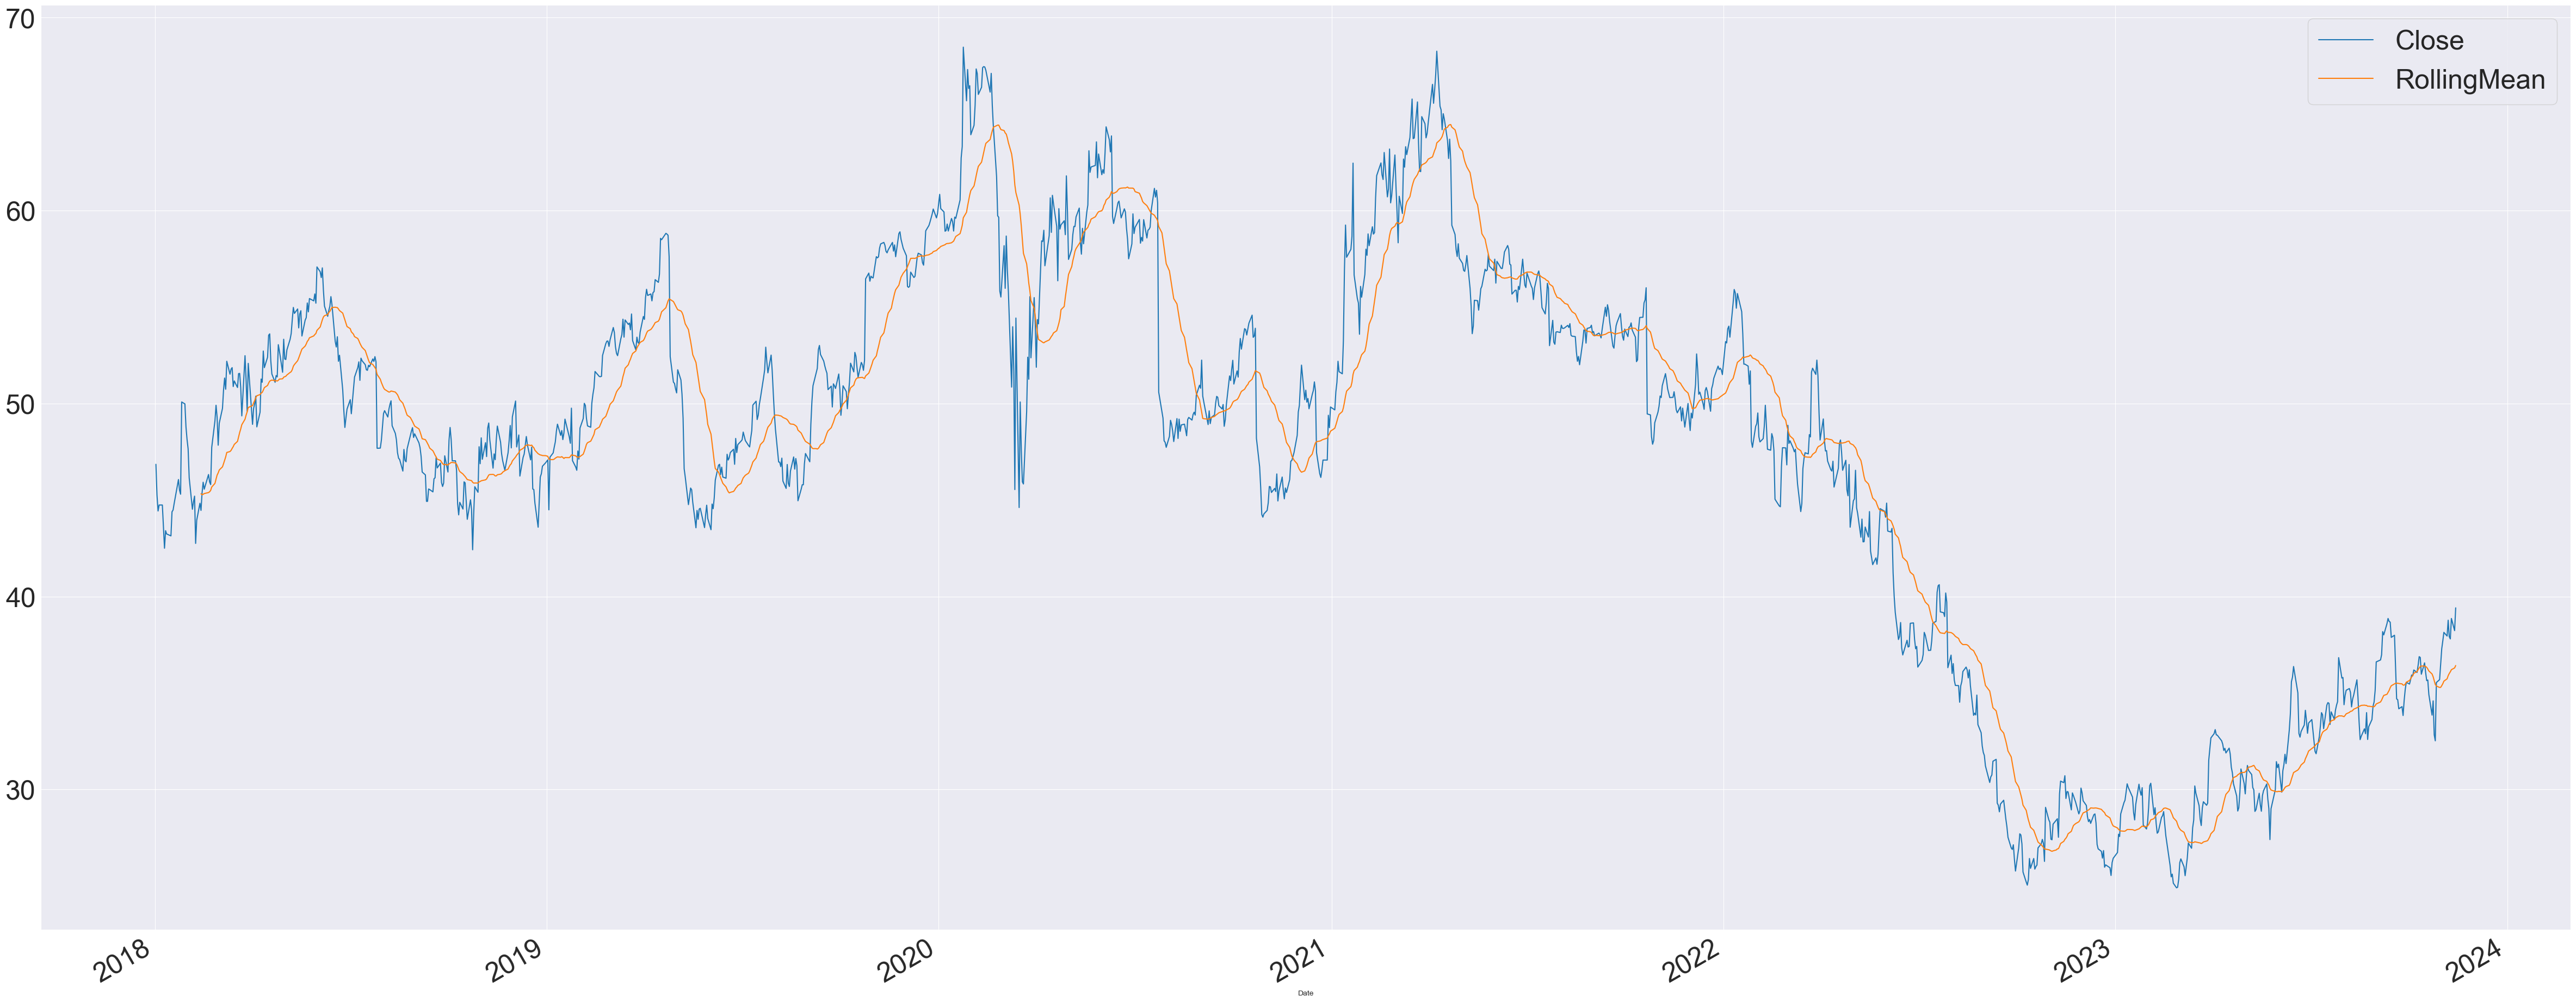

In [11]:
df['Close'].plot(figsize=(60, 25), fontsize=36)
df['RollingMean'].plot(figsize=(60, 25), fontsize=36)
plt.legend(fontsize=36)

In [12]:
# Plotting the stock price as well as the rolling mean
df['ZScore'] = (df['Close'] - df['RollingMean']) / df['RollingStd']
df

,Open,High,Low,Close,Adj Close,Volume,RollingMean,RollingStd,ZScore
Date,,,,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800,NaN,NaN,NaN
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000,NaN,NaN,NaN
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100,NaN,NaN,NaN
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000,NaN,NaN,NaN
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400,36.007000,1.418217,1.348876
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800,36.094333,1.445933,1.179630
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500,36.204667,1.526980,1.738945


In [13]:
df['Signal'] = 0  # 0 indicates no action
df.loc[df['ZScore'] > thresh, 'Signal'] = -1  # Sell signal
df.loc[df['ZScore'] < -thresh, 'Signal'] = 1  # Buy signal
df

,Open,High,Low,Close,Adj Close,Volume,RollingMean,RollingStd,ZScore,Signal
Date,,,,,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800,NaN,NaN,NaN,0
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000,NaN,NaN,NaN,0
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100,NaN,NaN,NaN,0
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000,NaN,NaN,NaN,0
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400,36.007000,1.418217,1.348876,-1
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800,36.094333,1.445933,1.179630,-1
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500,36.204667,1.526980,1.738945,-1


In [14]:
# Calculate percentage change in stocks
df['DailyReturns'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,RollingMean,RollingStd,ZScore,Signal,DailyReturns
Date,,,,,,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800,NaN,NaN,NaN,0,NaN
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000,NaN,NaN,NaN,0,-0.033938
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100,NaN,NaN,NaN,0,-0.018338
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000,NaN,NaN,NaN,0,0.006977
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400,36.007000,1.418217,1.348876,-1,-0.021924
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800,36.094333,1.445933,1.179630,-1,-0.003165
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500,36.204667,1.526980,1.738945,-1,0.028042


In [15]:
df['StrategyReturns'] = df['Signal'].shift(1) * df['DailyReturns']
df

,Open,High,Low,Close,Adj Close,Volume,RollingMean,RollingStd,ZScore,Signal,DailyReturns,StrategyReturns
Date,,,,,,,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800,NaN,NaN,NaN,0,NaN,NaN
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000,NaN,NaN,NaN,0,-0.033938,-0.000000
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100,NaN,NaN,NaN,0,-0.018338,-0.000000
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000,NaN,NaN,NaN,0,0.006977,0.000000
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800,NaN,NaN,NaN,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400,36.007000,1.418217,1.348876,-1,-0.021924,0.021924
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800,36.094333,1.445933,1.179630,-1,-0.003165,0.003165
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500,36.204667,1.526980,1.738945,-1,0.028042,-0.028042


In [16]:
df['CumulativeReturns'] = (1 + df['StrategyReturns']).cumprod()
df

,Open,High,Low,Close,Adj Close,Volume,RollingMean,RollingStd,ZScore,Signal,DailyReturns,StrategyReturns,CumulativeReturns
Date,,,,,,,,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800,NaN,NaN,NaN,0,NaN,NaN,NaN
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000,NaN,NaN,NaN,0,-0.033938,-0.000000,1.000000
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100,NaN,NaN,NaN,0,-0.018338,-0.000000,1.000000
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000,NaN,NaN,NaN,0,0.006977,0.000000,1.000000
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800,NaN,NaN,NaN,0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400,36.007000,1.418217,1.348876,-1,-0.021924,0.021924,2.830968
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800,36.094333,1.445933,1.179630,-1,-0.003165,0.003165,2.839927
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500,36.204667,1.526980,1.738945,-1,0.028042,-0.028042,2.760289


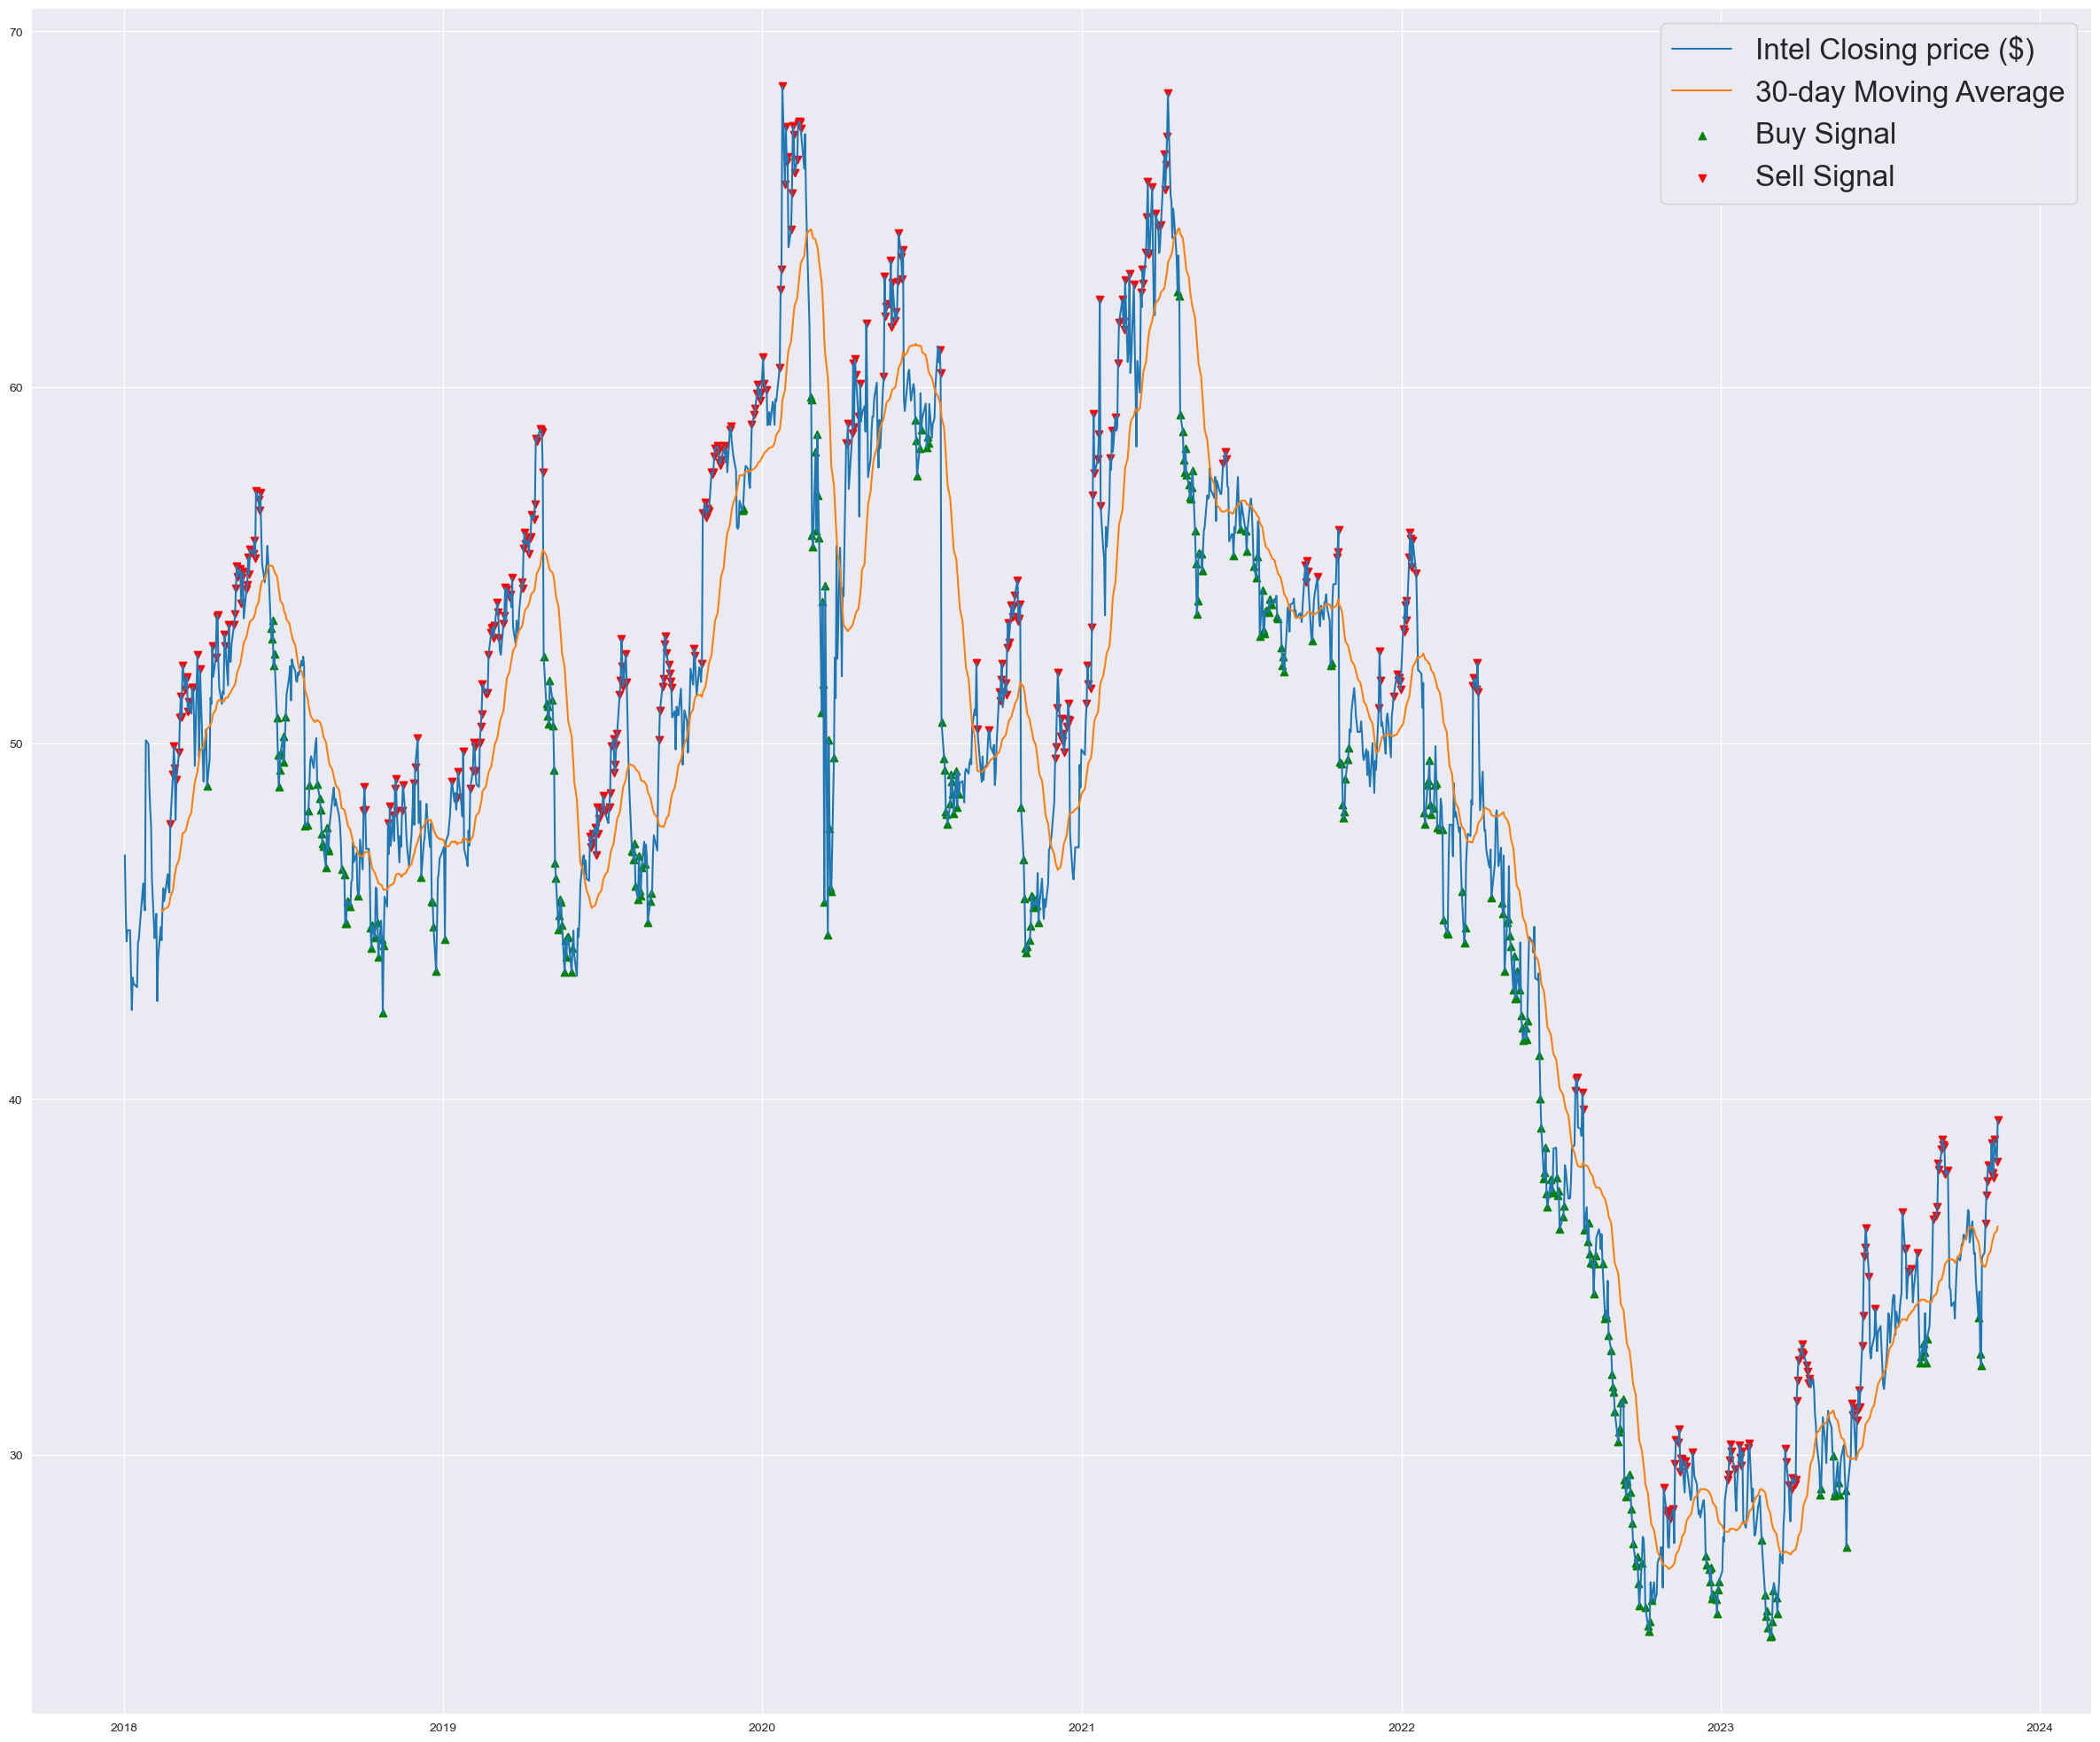

In [17]:
plt.figure(figsize=(30, 25))
plt.plot(df['Close'], label='Intel Closing price ($)')
plt.plot(df['RollingMean'], label=f'{window}-day Moving Average')
plt.scatter(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], marker='v', color='r', label='Sell Signal')
plt.legend(fontsize=24)
plt.show()

## This is our final indicator graph, we purchase INTC stocks and hold the long position when the ticker is green, and we sell the shares and hold the short position when the indicator is red. For all other instances, we hold the purchased stock.

# Backtesting our Algorithm

In [18]:
initial_investment = 10000
df['Portfolio'] = df['CumulativeReturns']*initial_investment
df

,Open,High,Low,Close,Adj Close,Volume,RollingMean,RollingStd,ZScore,Signal,DailyReturns,StrategyReturns,CumulativeReturns,Portfolio
Date,,,,,,,,,,,,,,
2018-01-02,46.380001,46.900002,46.209999,46.849998,39.857128,23370800,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-01-03,45.470001,46.209999,43.650002,45.259998,38.504459,116479000,NaN,NaN,NaN,0,-0.033938,-0.000000,1.000000,10000.000000
2018-01-04,43.520000,44.650002,42.689999,44.430000,37.798336,89209100,NaN,NaN,NaN,0,-0.018338,-0.000000,1.000000,10000.000000
2018-01-05,44.430000,45.150002,43.900002,44.740002,38.062077,41824000,NaN,NaN,NaN,0,0.006977,0.000000,1.000000,10000.000000
2018-01-08,44.270000,44.840000,43.959999,44.740002,38.062077,33733800,NaN,NaN,NaN,0,0.000000,0.000000,1.000000,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,38.849998,38.889999,37.750000,37.919998,37.919998,33483400,36.007000,1.418217,1.348876,-1,-0.021924,0.021924,2.830968,28309.684781
2023-11-09,38.049999,38.520000,37.770000,37.799999,37.799999,48955800,36.094333,1.445933,1.179630,-1,-0.003165,0.003165,2.839927,28399.271598
2023-11-10,38.240002,38.990002,38.240002,38.860001,38.860001,38862500,36.204667,1.526980,1.738945,-1,0.028042,-0.028042,2.760289,27602.888859


In [19]:
print((initial_investment + df['Portfolio'][-1] -  initial_investment)*100/initial_investment, "percent gain!")

271.84590570584794 percent gain!


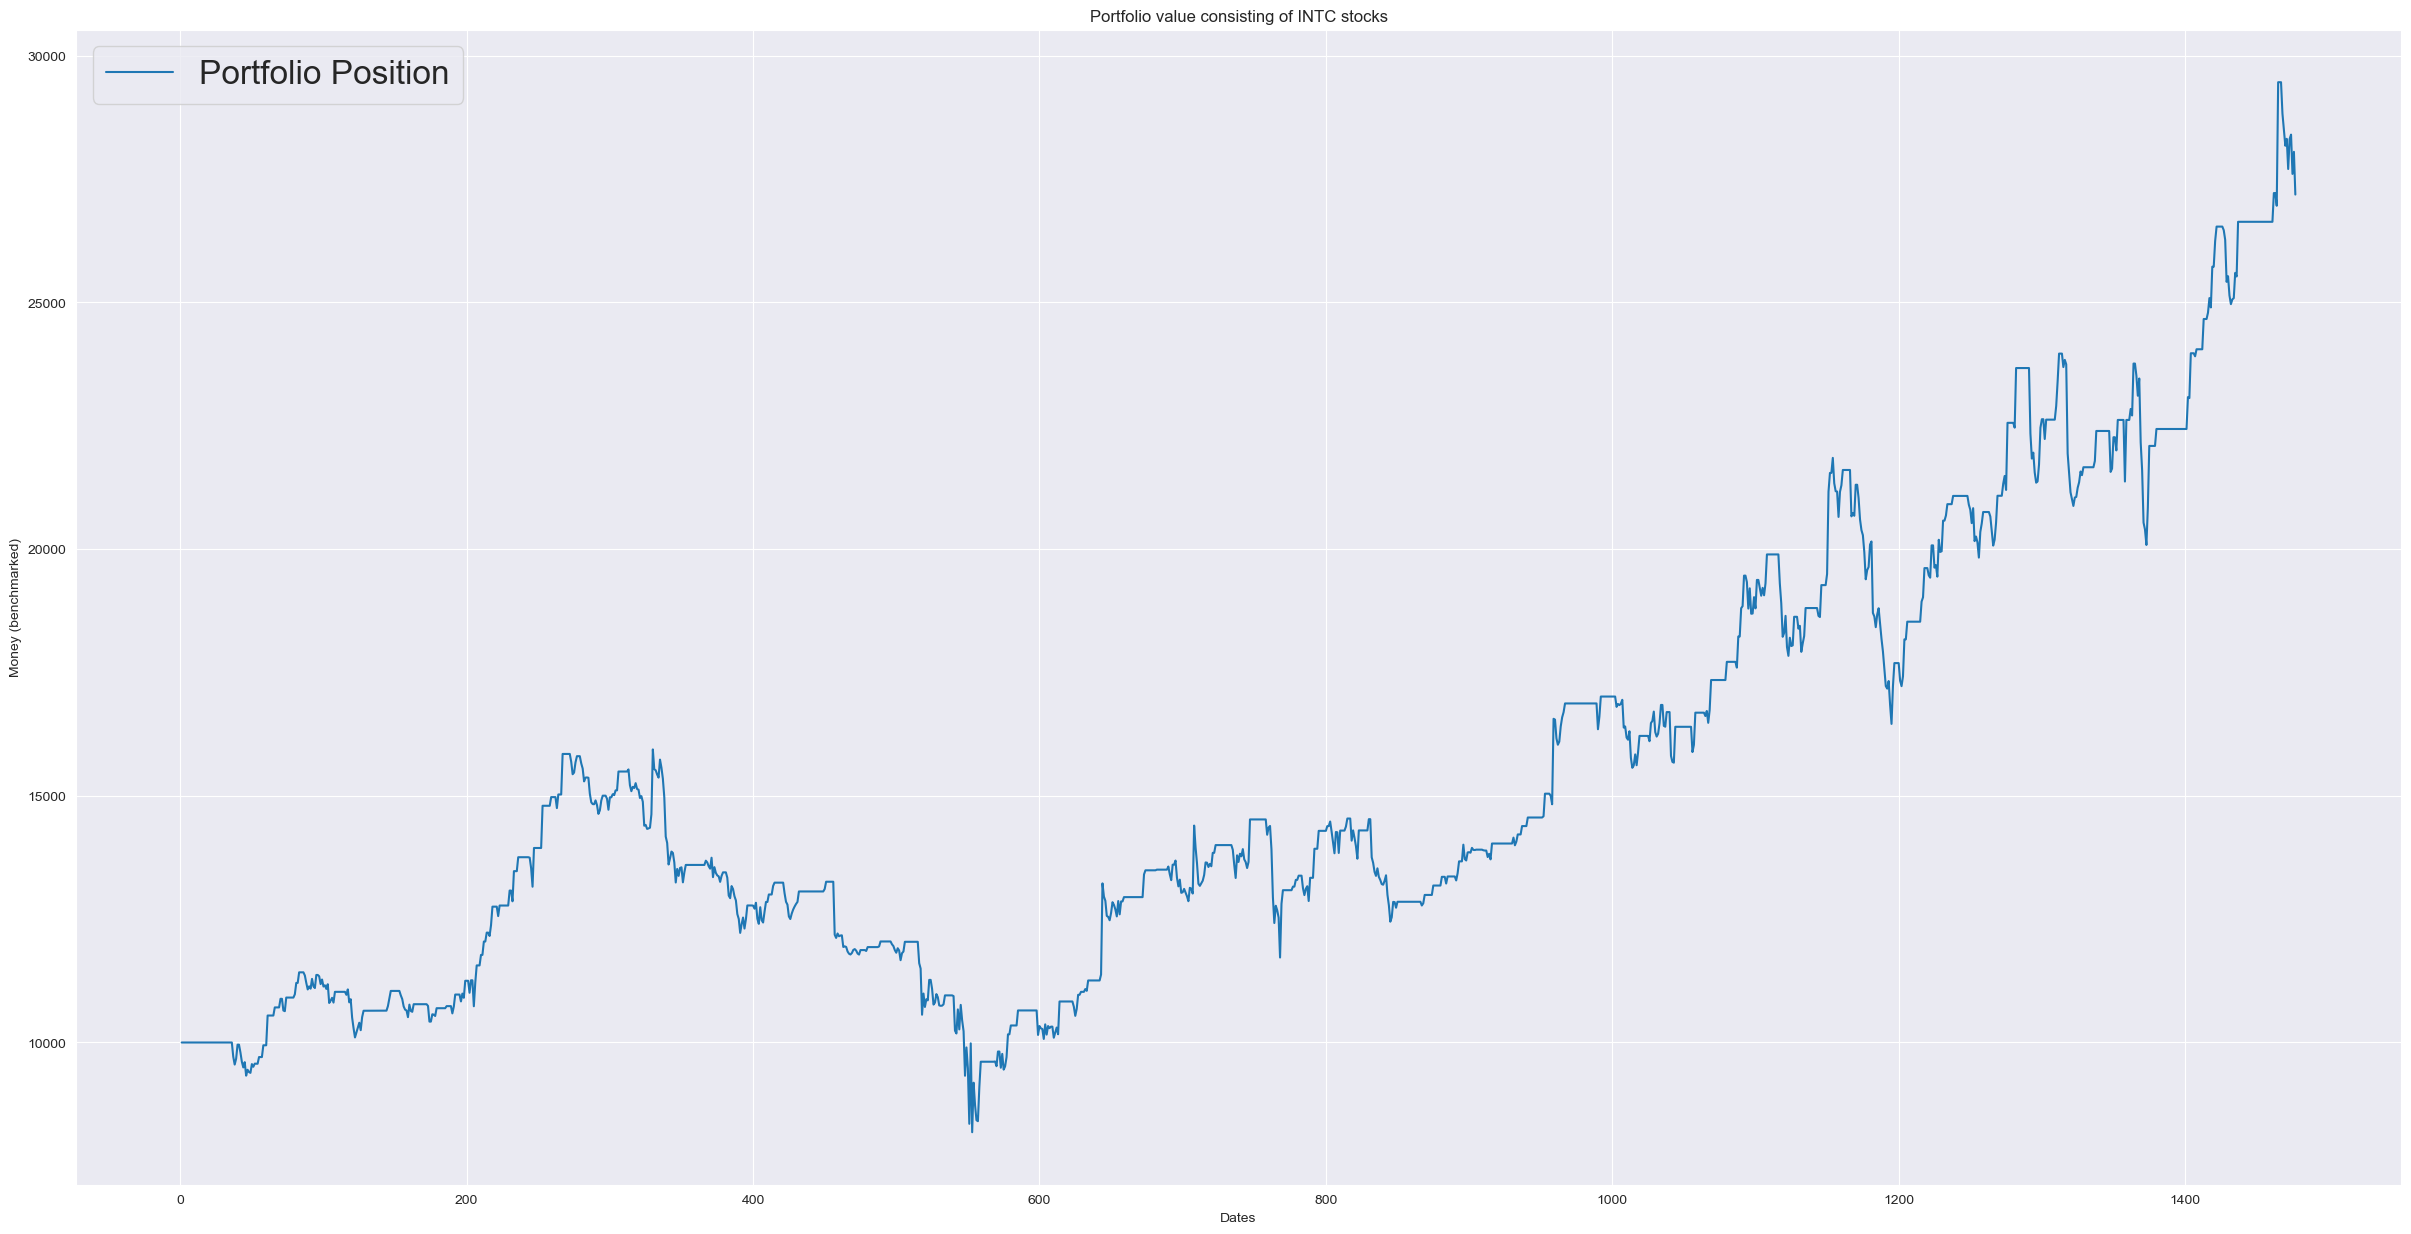

In [20]:
days = range(0, df.shape[0])
values = list(df['Portfolio'])

plt.figure(figsize=(30, 15))
plt.plot(days, values, label="Portfolio Position")
plt.xlabel("Dates")
plt.ylabel("Money (benchmarked)")
plt.title("Portfolio value consisting of INTC stocks")
plt.legend(fontsize=24)
plt.show()

## This is the value of our portfolio over the time frame, we start with an initial investment of 10000 which results in an ROI of approx. $27200 which is a 272% gain.

In [21]:
intel_price = list(df['Close'])
intel_price

[46.849998474121094,
 45.2599983215332,
 44.43000030517578,
 44.7400016784668,
 44.7400016784668,
 43.619998931884766,
 42.5,
 43.40999984741211,
 43.2400016784668,
 43.13999938964844,
 44.38999938964844,
 44.47999954223633,
 44.81999969482422,
 45.75,
 46.060001373291016,
 45.5099983215332,
 45.29999923706055,
 50.08000183105469,
 49.97999954223633,
 48.790000915527344,
 48.13999938964844,
 47.650001525878906,
 46.150001525878906,
 44.52000045776367,
 44.90999984741211,
 45.20000076293945,
 42.75,
 43.95000076293945,
 44.83000183105469,
 44.459999084472656,
 45.380001068115234,
 45.91999816894531,
 45.560001373291016,
 46.31999969482422,
 45.939998626708984,
 45.79999923706055,
 47.72999954223633,
 49.11000061035156,
 49.90999984741211,
 49.290000915527344,
 47.84000015258789,
 48.97999954223633,
 49.75,
 50.709999084472656,
 51.31999969482422,
 50.7400016784668,
 52.189998626708984,
 51.52000045776367,
 51.779998779296875,
 51.86000061035156,
 50.880001068115234,
 51.16999816894531,


In [22]:
vol = initial_investment/intel_price[0]
vol

213.44717877683132

In [23]:
hold_portfolio = [price * vol for price in intel_price]
hold_portfolio

[10000.0,
 9660.618953175383,
 9483.458218193526,
 9549.627136739437,
 9549.627136739437,
 9310.5657102592,
 9071.505098015332,
 9265.741998132793,
 9229.456368574189,
 9208.111162154684,
 9474.920135625724,
 9494.130414285093,
 9566.70248763867,
 9765.208429040033,
 9831.377347585943,
 9713.980747869591,
 9669.157035743185,
 10689.43510397717,
 10668.089897557666,
 10414.088047938329,
 10275.347056038841,
 10170.75839441056,
 9850.587626245313,
 9502.668496852895,
 9585.912766298039,
 9647.81264356005,
 9124.866892709539,
 9381.00367008901,
 9568.837415398806,
 9489.861373001191,
 9686.233200878789,
 9801.494058598637,
 9724.653758197528,
 9886.873255803917,
 9805.763099882539,
 9775.8806251316,
 10187.833745309794,
 10482.391080008005,
 10653.148660182196,
 10520.811637326744,
 10211.313065253065,
 10454.642718780833,
 10618.997144147359,
 10823.906240356388,
 10954.109149688074,
 10830.310209400424,
 11139.807967237733,
 10996.798748290714,
 11052.294656508688,
 11069.370821644292,


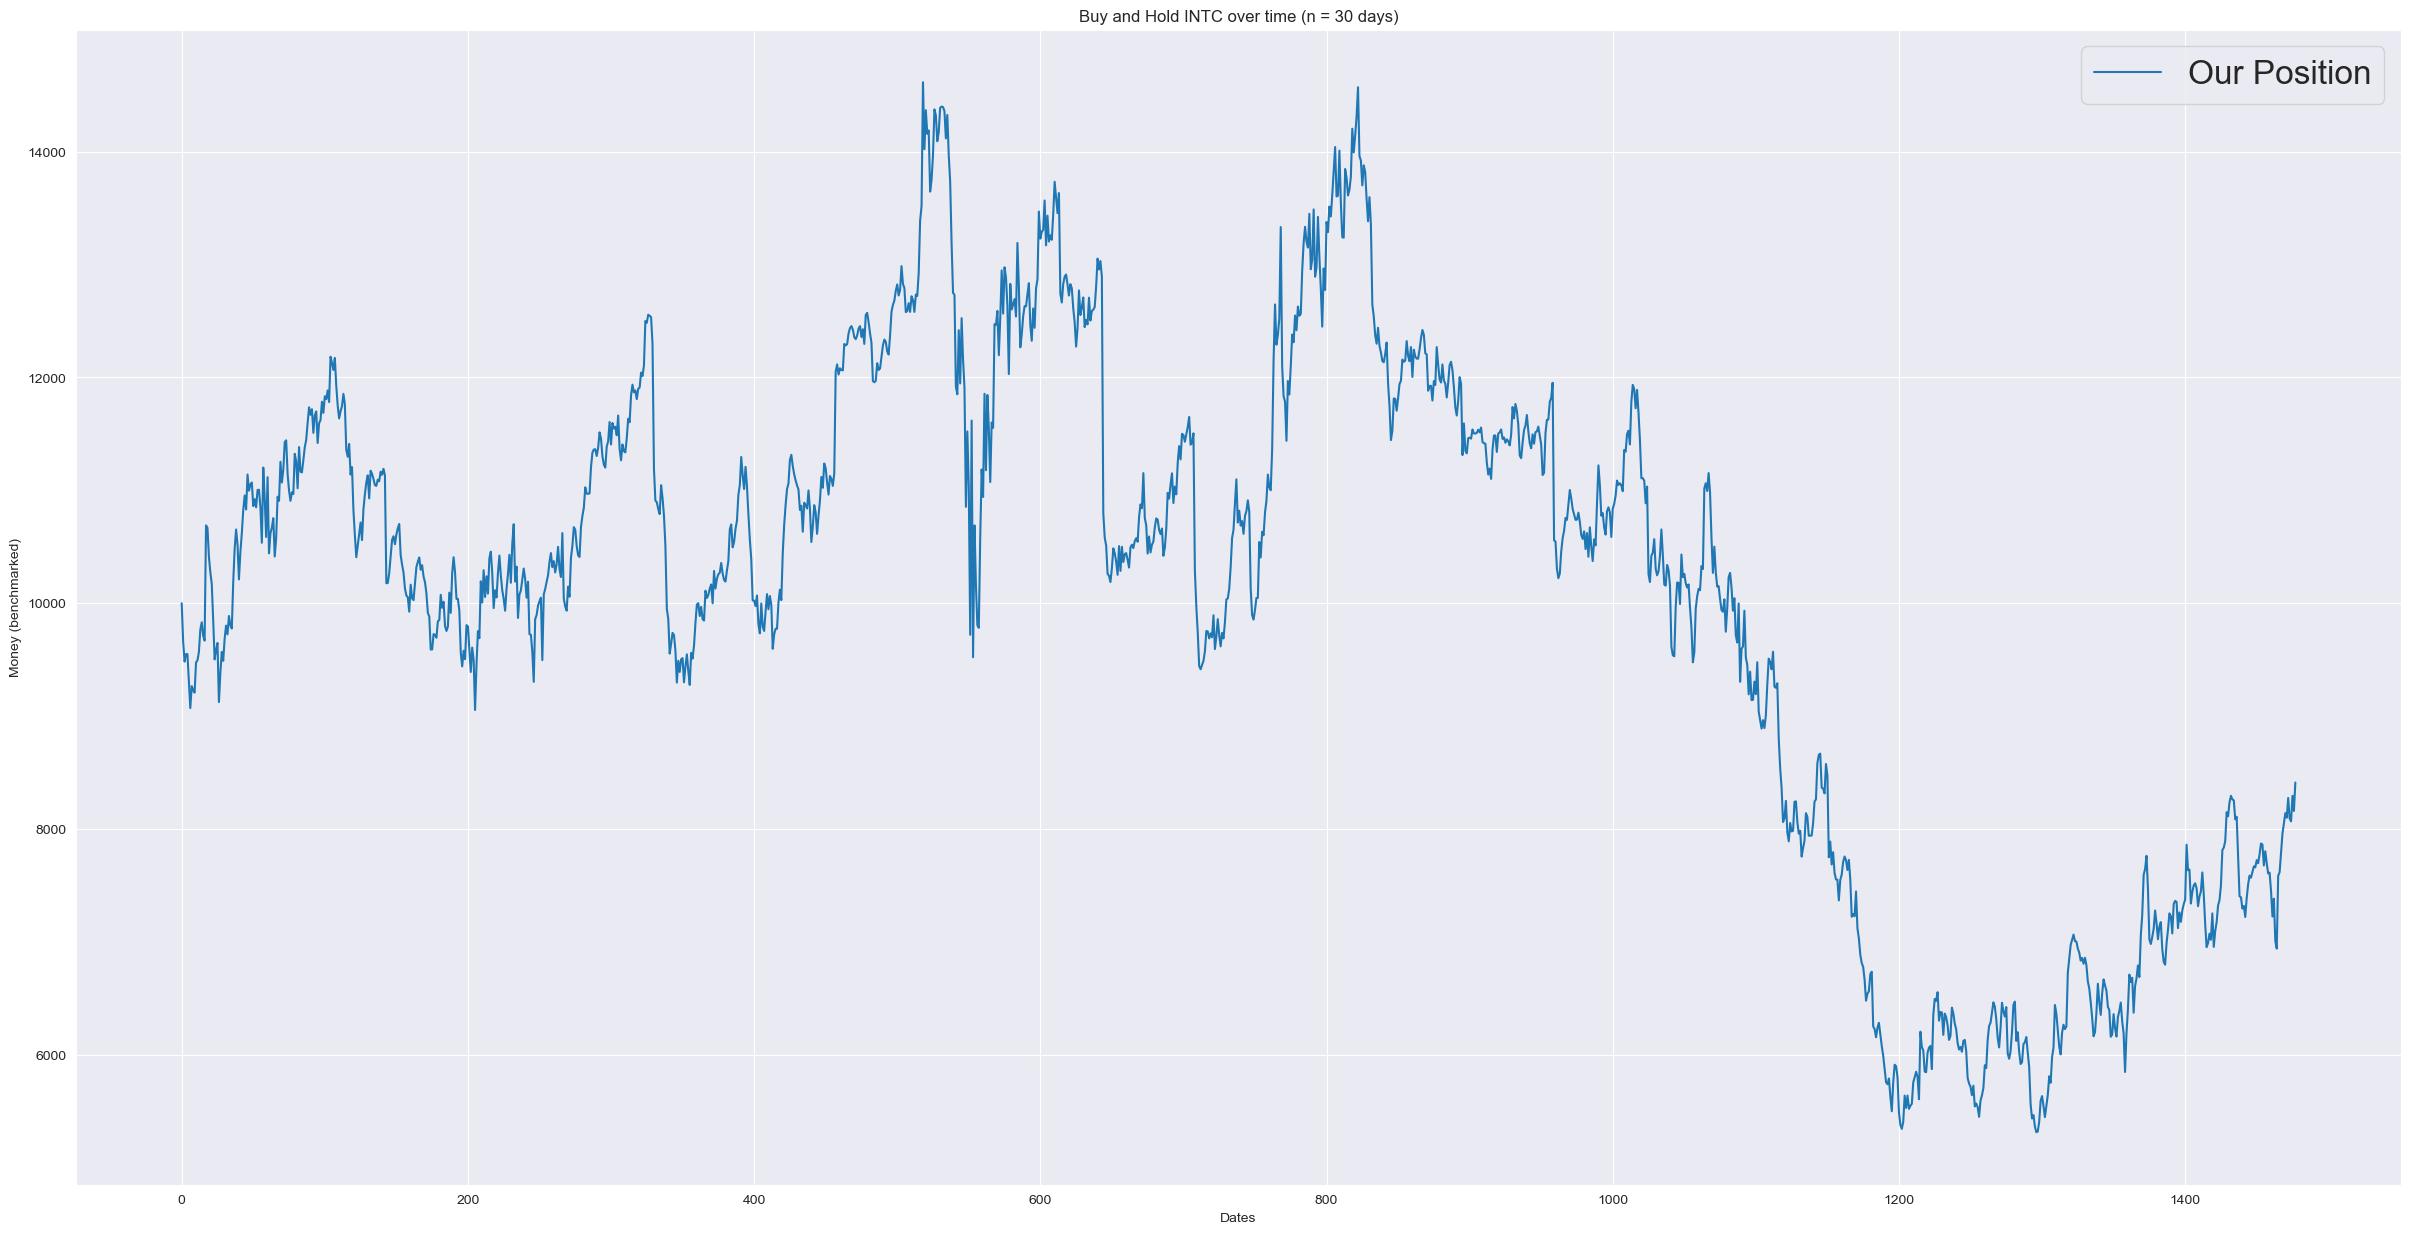

In [24]:
days = range(0, df.shape[0])

plt.figure(figsize=(30, 15))
plt.plot(days, hold_portfolio, label="Our Position")
plt.xlabel("Dates")
plt.ylabel("Money (benchmarked)")
plt.title("Buy and Hold INTC over time (n = 30 days)")
plt.legend(fontsize=24)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


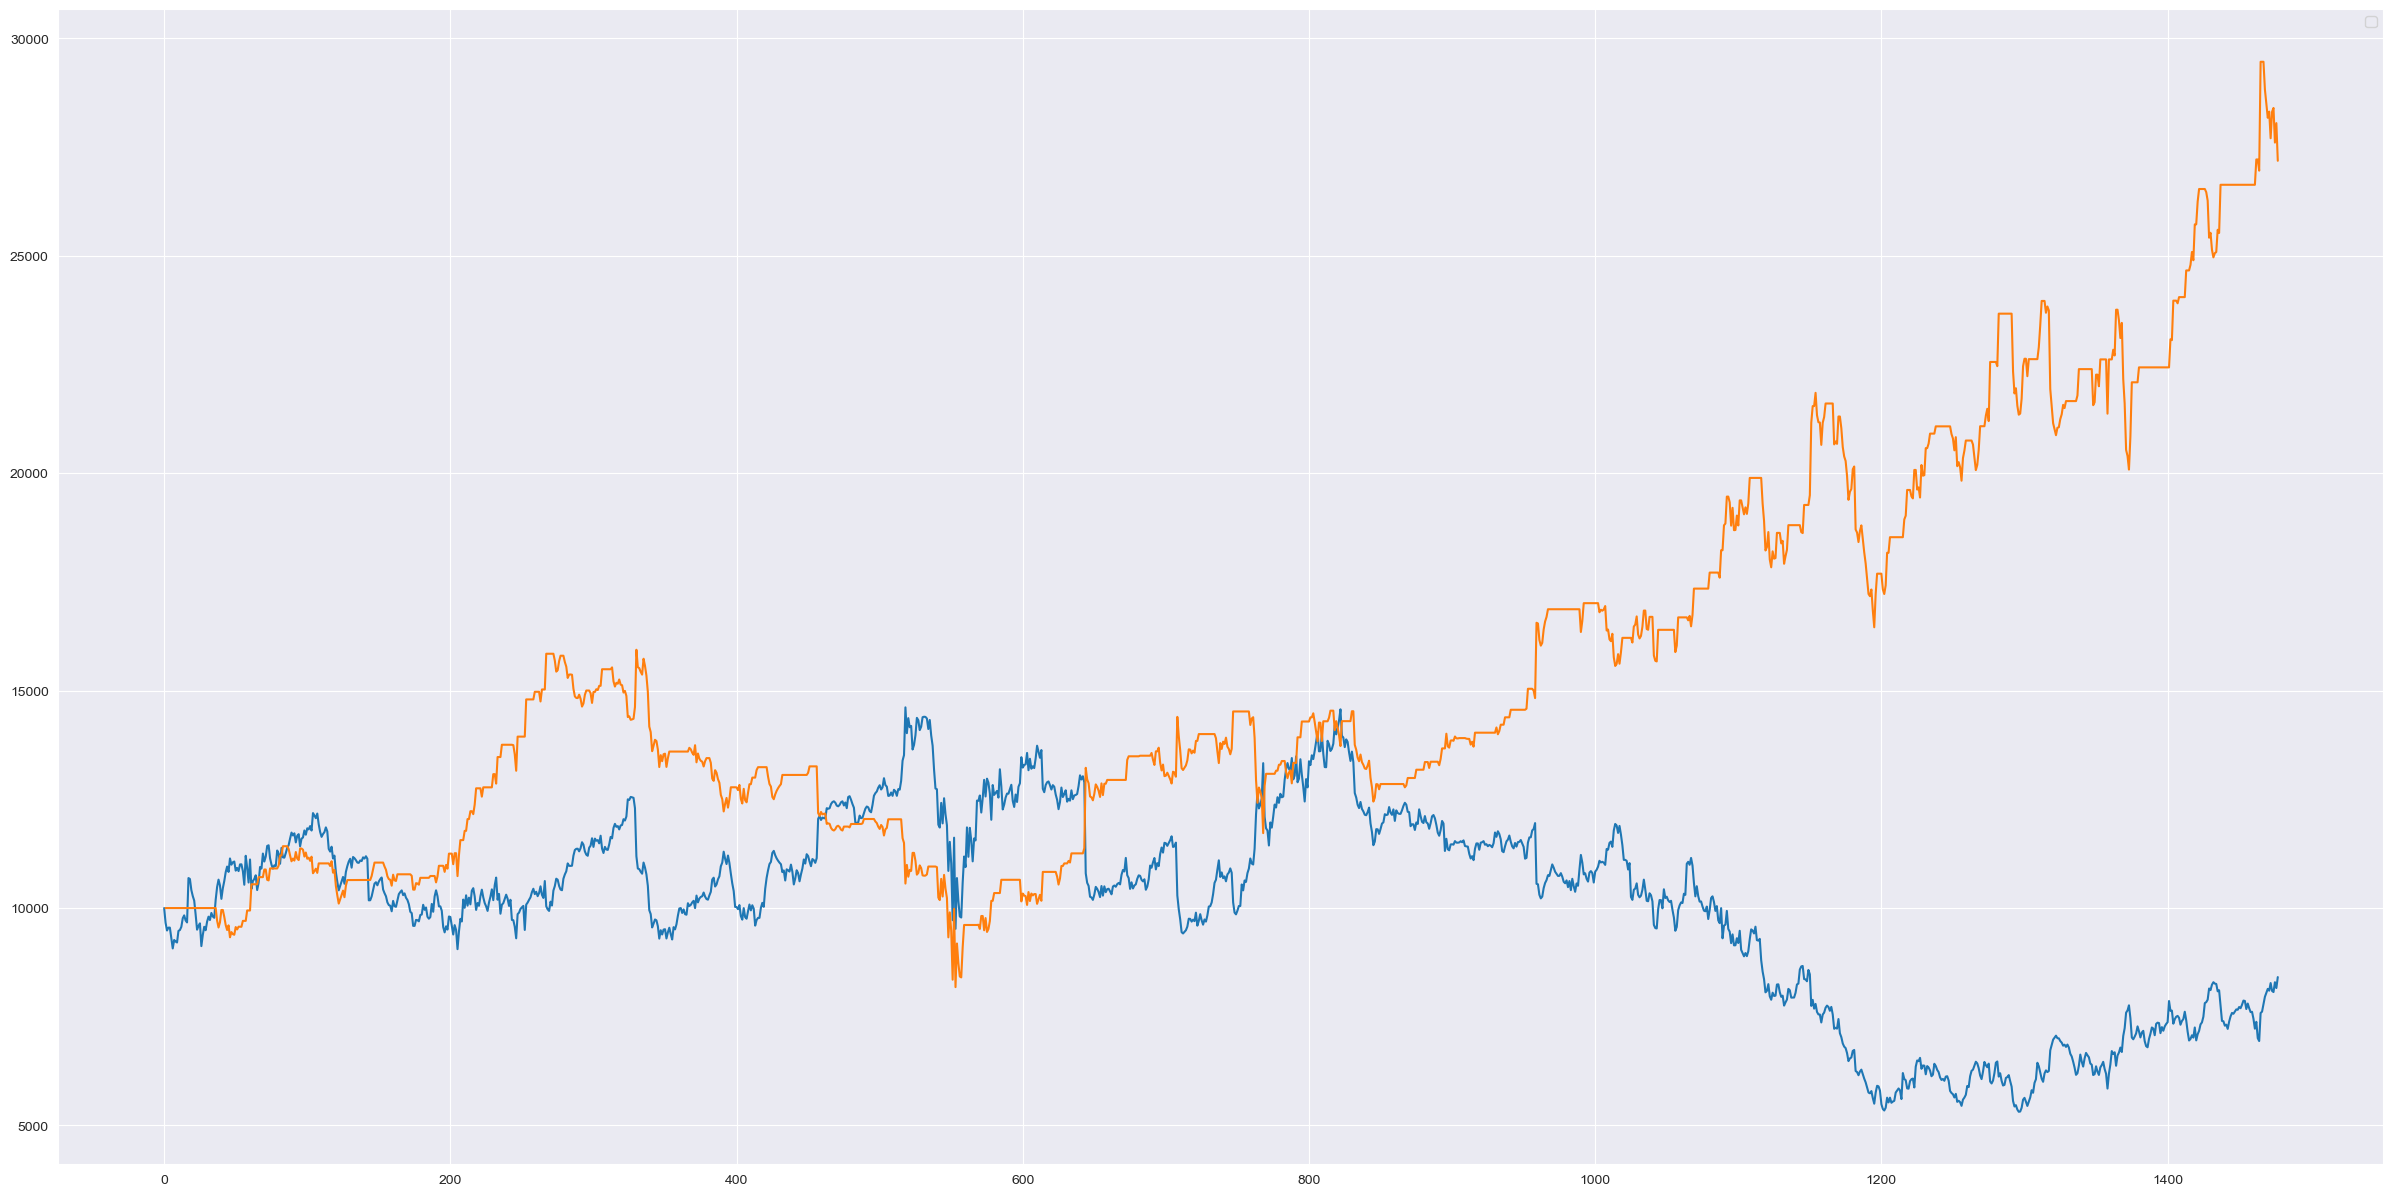

In [25]:
plt.figure(figsize=(30, 15))
plt.plot(hold_portfolio)
plt.plot(values)
plt.legend()

## Statistical Testing

## Null Hypothesis: Unlike what the EMH states, there will be a significant difference in mean profits.
## Alternative Hypothesis: There will be no significant difference in mean profits

(array([111., 300., 459., 151., 134.,  89., 136.,  42.,  43.,  12.]),
 array([ 8181.64280448, 10309.58221851, 12437.52163253, 14565.46104656,
        16693.40046059, 18821.33987462, 20949.27928865, 23077.21870268,
        25205.1581167 , 27333.09753073, 29461.03694476]),
 <BarContainer object of 10 artists>)

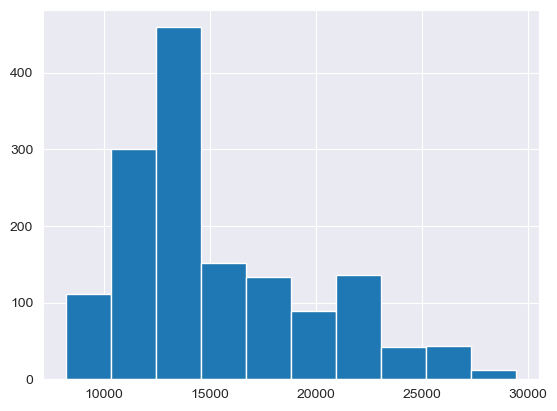

In [26]:
plt.hist(values)

## We can clearly see that the data is not normally distributed. However to be sure of our inference we will use the Shapiro-Wilk test to test for Normality

### Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

In [27]:
from scipy.stats import shapiro

statistic, p_value = shapiro(values[1:])

print(f"Shapiro-Wilk U statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The data does not follow a Normal Distribution")
else:
    print("Fail to reject the null hypothesis: The data follows a Normal Distribution")

Shapiro-Wilk U statistic: 0.9100052118301392
P-value: 1.0769803860132069e-28
Reject the null hypothesis: The data does not follow a Normal Distribution


### As our data is not normalised we cannot use t-test, z-test, f-test or ANOVA for Hypothesis Testing

## The Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.
Assumptions: 
1. All the observations from both groups are independent of each other,
2. The responses are at least ordinal (i.e., one can at least say, of any two observations, which is the greater),
3. Under the null hypothesis H0, the distributions of both populations are identical.

In [28]:
from scipy.stats import mannwhitneyu
print('***** MANN-WHITNEY U TEST *****')
statistic, p_value = mannwhitneyu(values[1:], hold_portfolio[1:], alternative='two-sided')

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean profits.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean profits.")

***** MANN-WHITNEY U TEST *****
Mann-Whitney U statistic: 1890842.0
P-value: 4.0905555758855e-261
Reject the null hypothesis: There is a significant difference in the mean profits.


## To double down on our inference we use the Wilcoxon signed-rank test. The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used either to test the location of a population based on a sample of data, or to compare the locations of two populations using two matched samples. 
Assumptions:
1. The two samples need to be dependent observations of the cases.
2. The two samples are mutually independent.
3. The measurement scale is at least ordinal, and the variable is continuous

In [29]:
from scipy import stats
print('***** WILCOXON TEST *****')
res = stats.wilcoxon(hold_portfolio[1:], values[1:], alternative='two-sided')

print(f"Kruskal statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if res.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean profits.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean profits.")

***** WILCOXON TEST *****
Kruskal statistic: 100272.0
P-value: 1.3788447372185972e-162
Reject the null hypothesis: There is a significant difference in the mean profits.
